<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML3_RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **3. Classificação: Regressão Logística**
---

Nesta aula você vai aprender sobre:

*	A Classificação com modelo de Regressão Logística
*	Uma primeira Métrica de desempenho dos modelos: Acuracidade
*	O que é o Dilema Bias-Variância, e como empregar conjuntos de Treinamento e Teste e minimizar os riscos de sobreajuste



Na aula anterior você pôde entender a diferença entre problemas de **Regressão** e de **Classificação**, e aprendeu a criar modelos para a predição de valores com modelos de Regressão Linear. Tanto a Regressão como a Classificação são modelos de **Aprendizado Supervisionado**, e envolvem um conjunto de dados de treinamento com exemplos de entradas e saídas rotuladas.

Nesta aula vamos começar a explorar os modelos Classificação. Esses modelos serão nosso foco a partir de agora ao longo de todo o curso! Mas vamos começar, nesta aula, aprendendo um único modelo de Classificação, denominado **Regressão Logística**, e algumas métricas que permitem *medir* a eficiência desse modelo à exemplo do que você viu no coeficiente de determinação ($R$-$Square$) para modelos de Regressão Linear.

Você vai entender também que, nem sempre um modelo que responde corretamente à 100% dos dados de treinamento será um bom modelo. É o dilema conhecido como **Dilema Bias-Variância**, e um problema que frequentemente surge ao trabalharmos com dados e que você precisa saber lidar. 




Modelos de Regressão estimam valores ou quantidades, como a área média de um tumor a partir de outras medidas como raio e textura médias. Já os Modelos de Classificação estimam a partir dos atributos de entrada categorias, como 'M'aligno ou 'B'enigno no exemplo abaixo.



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ClassificationRegressionBreastCancer2.png" width=800, align="center">



<small>

<b>
Figura 1. Modelos de Regressão X Classificação. Modelos de Regressão estimam valores ou quantidades, enquanto Modelos de Classificação estimam categorias como no exemplo acima 'M'aligno ou 'B'enigno.

Para essa tarefa de Classificação em diferentes categorias, Maligno/Benigno, Fraude/Não Fraude, Spam/Não Spam, ou mesmo categorias não binárias, como Edifícios, Pessoas ou Paisagens em uma classificação de fotos, existem diversos modelos e, nesta aula, nos deteremos no modelo de Regressão Logística. Todos os modelos que veremos, seguem o mesmo esquema de Modelos Supervisionados e, por isso, é importante que você fique atento às características que serão comuns à vários modelos de classificação (como as métricas de eficiência, esquema geral de implementação etc.).

<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide4.PNG" width=800, align="center">

<small>

<b>
Figura 2. Esquema geral dos Modelos de Aprendizado Supervisionado e diferentes Modelos de Regressão e Classificação.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# Regressão Logística: *Classificador Logístico*

Antes de começarmos a falar de Regressão Logística um ponto de atenção: você não deve confundir modelos de regressão em geral, lineares ou não, que preveem valores com a Regressão Logística que é um modelo de Classificação. Embora isso possa ser claro quando você lê este texto ou vê as figuras acima, o fato de carregar o nome *Regressão*, na Regressão Logística é fonte geral de confusão. Melhor seria adotarmos a denominação *Classificador Logístico* evitando-se assim a confusão. 

A Regressão Logística  modela as probabilidades para problemas de classificação binários, com dois resultados possíveis, como *yes/no*, *true/false*, *fraude/não fraude*, *spam/não spam* ou *0/1*, e pode ser entendido como uma extensão dos modelos de regressão linear para problemas de classificação.

> **Importante: A Regressão Logística é um classificador Binário, isto é, ele só classifica categorias Dicotômicas, como *yes/no*, *true/false*!**

O fato de somente classificar categorias Dicotômicas fica claro quando você pensa que saída do modelo é uma única probabilidade $P$, por exemplo a de ser benigno $P(Y=Benigno)$ e que, portanto, podemos apenas obter agora a probabilidade de não ser benigno,  $P(Y \ne Benigno) = 1 - P(Y = Benigno)$. Isso pode parecer uma grande limitação, mas na verdade você sempre pode dividir um problema multiclasse (Edifícios/Pessoas/Paisagens ou Conservador/Moderado/Agressivo) em vários problemas binários (pense, como você faria isso?). 

<img src="https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/linearregressionlogitbreast1.PNG?raw=true" width=1200> 

<small>

<b>
Figura 3. Modelos matemáticos da Regressão Logística e Linear. 

Para obter essa probabilidade a regressão logística buscará os melhores coeficientes em uma expressão semelhante a que empregamos na regressão linear. É uma expressão que emprega uma combinação linear das variáveis preditoras à qual aplicamos a função logística $\sigma(x)=\frac{1}{1+e^{-x}}$. Vamos ver como chegamos a essa expressão.




## Modelo logístico

Para obtermos essas probabilidades, a regressão logística modela o que é conhecido como log de probabilidades:

$$ log( \frac{p}{1-p}) = a_0 + a_1 x_1 + ... + a_n x_n $$

Os resultados da regressão logística vão então informar sobre as chances ('Odds') e razão das chances ('Odds Ratio') e não exatamente probabilidades (por exemplo, em alguns casos os valores podem não ter soma 1), mas podemos entender de qualquer modo que uma *chance* reflete em uma probabilidade maior daquele evento ocorrer. Se um evento tem probabilidade $p$, suas chances são $p / (1-p)$, e é por isso que a esquerda lado é chamado de "odds logarítmicas" ou "logit", e podemos obter a 
probabilidade de chances invertendo a função acima:

$$ p = 1 / (1 + e^{- ( a_0 + a_1 x_1 + ... + a_n x_n ) })$$

Essa função é conhecida como  função logística ou sigmóide, $\sigma$, é definida como:


$$\sigma(x)=\frac{1}{1+e^{-x}}$$


Ela tem o seguinte gráfico:



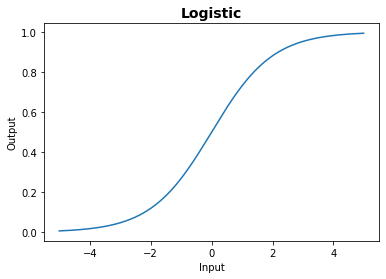

In [ ]:
x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))

plt.plot(x,y)
plt.title('Logistic', fontsize=14, weight='bold')
plt.xlabel('Input')
plt.ylabel('Output')

plt.show()

e desempenha um papel importante em outros modelos, como os modelos neurais. Note que os valores dessa função variam de 0 a 1 e é portanto, possível empregar essa função como uma medida de probabilidade, ou das chances. 

Esse procedimento funciona muito melhor para classificação que a regressão linear e podemos usar 0.5 como o valor limite de probabilidades entre as classes, isto é, valores $p < 0.5$ para uma classe e valores $p \ge 0.5$ para outra. 

## Estimando os parâmetros

Estimar os valores dos coeficientes $a_0, a_1, ...$. pode seguir a mesma estratégia empregada para calcular os coeficientes de uma regressão múltipla e empregamos um otimizador, como o método de mínimos quadrados.

Do mesmo modo que na regressão linear você deseja minimizar o erro ou maximizar os *acertos* do modelo. Para cada amostra que  pertence à classe '1', você irá querer que $p$ fique mais próximo de $1$ enquanto, para cada amostra que não  pertence à classe '1', você quer que $p$ seja o mais próximo de $0$ possível. As diferenças consistem no erro que queremos minimizar e podemos então, a partir de valores iniciais de dos coeficientes $a_0, a_1, ...$ empregar um método de otimização como o de mínimos quadrados, ou um método gradiente, para obter  os coeficientes que fornecem o menor erro. 




# Classificando *Moons* e Empréstimos 

Vamos começar classificando um conjunto aleatório de dados que denominaremos *Moons*. Cada um dos 100 pontos, *moons*, possui 2 atributos e recebe uma classe $1$ ou $0$.

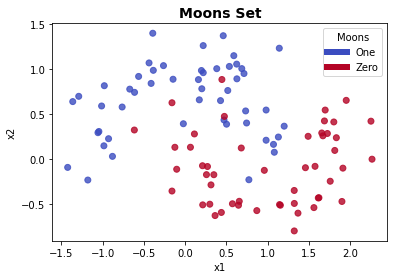

         x1        x2  y
0 -0.763251  0.577354  0
1 -0.391942  1.395641  0
2  1.324561 -0.492319  1
3  0.271295 -0.082532  1
4  2.253887  0.420281  1


In [ ]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.coolwarm 

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

Talvez você considere esse problema um problema pouco interessante, afinal estamos apenas gerando dados aleatórios. Esse exemplo de *brinquedo*, entretanto, já traz os elementos essenciais que precisamos saber para criar classificadores supervisionados e poderíamos  igualmente ter uma base com dados de empréstimos, com idade e valor dos empréstimos tomados pelos clientes, classificados entre empréstimos pagos ou inadimplentes (*default*) para prever concessões de novos empréstimos. 

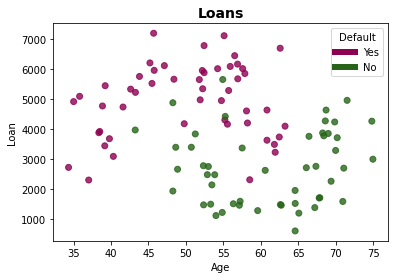

         age         loan  default
0  41.604235  4732.639984        0
1  45.688635  7188.319998        0
2  64.570169  1522.549822        1
3  52.984240  2752.321406        1
4  74.792752  4261.263330        1


In [ ]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.PiYG

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df_loans = pd.DataFrame({'age':X[:, 0], 'loan':X[:, 1], 'default':y})

df_loans.age = df_loans.age + 50 + df_loans.age*10
df_loans.loan = df_loans.loan + 3000 + df_loans.loan*3000

plt.scatter(df_loans.age, df_loans.loan, c=df_loans.default, cmap=cmap_data, alpha=0.8)
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("Age")
plt.ylabel("Loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['Yes', 'No'], loc='upper right',title='Default')

plt.show()

print(df_loans.head())

Vamos então entender como empregar o classificador logístico do `scikit-learn` neste exemplo de brinquedo, entendendo cada passo e que são empregados depois para quaisquer outros algoritmos supervisionados.



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide5.PNG" width=800, align="center">

<small>

<b>
Figura 4. Esquema geral de Implementação de Modelos Supervisionados com estimadores do SciKit-Learn. 


1. **Definimos as Entradas e Saídas do Modelo**. Seus recursos e rótulos.
2. **Definimos a Classe de Modelos a ser empregada**. 
3. **Treinamos o Modelo**. Isto é, buscam-se os parâmetros que melhor ajustam o modelo aos dados.
4. **Prevemos novos casos**. Aplicamos o modelo para novos casos.



## Import dos Estimadores

Antes de mais nada podemos importar os pacotes necessários para a execução do nosso modelo. 

Cada algoritmo de aprendizado na API  do scikit-learn é exposto como  objeto chamado de *estimador*. Por exemplo, você viu que para a regressão linear há o estimador `sklearn.linear_model.LinearRegression`, para a regressão logística o estimador será o `from sklearn.linear_model import LogisticRegression`.

In [ ]:
from sklearn.linear_model import LogisticRegression 


## Definimos as Entradas e Saídas do Modelo

Essa operação pode requerer uma série de transformações e seleções dos dados e, normalmente, é uma parte bastante custosa da implementação completa dos modelos. Mas aqui nossos dados são bastante simples e podem ser empregados diretamente sem qualquer preparação.

In [ ]:
X = df[['x1','x2']]
y = df.y


## Definimos a Classe de Modelos com seus Parâmetros

Fazemos isso isnstanciando o modelo com seus parâmetros.

In [ ]:
clf = LogisticRegression(max_iter=1000)
print(clf)

LogisticRegression(max_iter=1000)


E empregamos o nome `clf` arbitrariamente apenas para designar nosso classificador e o parâmetro `max_iter` define o número máximo de iterações que o otimizador irá empregar para obter numericamente, por aproximações sucessivas, os melhores coeficientes do modelo.

## Treinamento do Modelo 

Os parâmetros ou coeficientes do modelo são obtidos com a função `fit()`, buscando os melhores parâmetros ou coeficientes que se ajustam aos dados através de um otimizador (`solver`).

In [ ]:
clf.fit(X,y)

print( clf.coef_, clf.intercept_)

[[ 1.21523438 -2.60803724]] [0.12484869]


Os valores `coef_` e `clf.intercept_` são os parâmetros estimados para regressão logística e irão variar de modelo para modelo.

## Predição 

O método `predict()` fornece então a predição de dados com base nos parâmetros estimados do modelo.  

In [ ]:
clf.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

Ainda existem outros preditores úteis que retornam a probabilidade ou o log da probabilidade de cada classe, o que é  útil quando se deseja refinar os resultados ou ainda desejamos empregar esses valores para solução de problemas multiclasse.

In [ ]:
clf.predict_proba(X)[0:10]

array([[0.90957378, 0.09042622],
       [0.98186015, 0.01813985],
       [0.04659762, 0.95340238],
       [0.33854573, 0.66145427],
       [0.14582354, 0.85417646],
       [0.14251362, 0.85748638],
       [0.03145696, 0.96854304],
       [0.91387591, 0.08612409],
       [0.96036923, 0.03963077],
       [0.87472292, 0.12527708]])

In [ ]:
clf.predict_log_proba(X)[0:10]

array([[-0.09477916, -2.40322103],
       [-0.01830639, -4.00964435],
       [-3.06620578, -0.04771824],
       [-1.08309611, -0.41331442],
       [-1.925358  , -0.15761748],
       [-1.94831768, -0.15374999],
       [-3.45913493, -0.03196236],
       [-0.09006048, -2.45196614],
       [-0.04043746, -3.22814934],
       [-0.13384811, -2.07722732]])

# Classificação de Fraudes e Tumores

Para concluir, o mesmo se aplicaria, e os mesmos códigos poderiam ser empregados, se você quisesse implementar um modelo para detecção de  detecção de fraude de transações de cartão de crédito com base nos Valores da operação e uso do cartão nas últimas 24h, duas variáveis reconhecidas como fortes preditoras de fraude de cartões. O modelo empregado seria então,

$$ P(\text{Fraude} | \text{Valor, Trans24h}) = \frac{1}{ (1 + e^{- ( a_0 + a_1 \text{Valor} + a_2 \text{Trans24h} ) })}$$




 



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/MLLogistic.png" width=800, align="center">

<small>

<b>
Figura 5. Esquema geral do Modelo Logístico aplicado à classificação de Fraudes em operações com Cartões. 

Depois de estimados os coeficientes $a_0, a_1, a_2$ com base nas amostras conhecidas, você poderia aplicar dados de uma nova operação `(Valor,Trans24h)` para estimar a chance da operação ser ou não uma fraude. Um modelo análogo pode ser também aplicado igualmente à classificação dos tumores Malignos ou Benignos como apresentamos no início desta aula e você poderá ver a implementação desse modelo logo mais adiante.

# Score do Modelo: Acuracidade

Por último podemos medir a eficiência do nosso modelo, diretamente ou ainda a partir do `score()`. 

In [ ]:
clf.score(X,y)

0.87

Esse score de $0.87$, corresponde à **Acuracidade do Modelo** sobre o nosso conjunto de treinamento `X`, isto é, o percentual de acerto do nosso modelo quando comparamos com os rótulos (as respostas) presentes no nosso conjunto. Você pode obter o mesmo valor apenas contando o número de acertos da predição sobre o total de casos. 


 

In [ ]:
sum( clf.predict(X) == y ) / len(X)

0.87

Ou ainda construir uma tabela para comparar os acertos e erros dos modelo.

In [ ]:
df['y_pred'] = clf.predict(X)
df['prediction'] = df['y_pred'] == df['y']
df


,x1,x2,y,y_pred,prediction
0,-0.763251,0.577354,0,0,True
1,-0.391942,1.395641,0,0,True
2,1.324561,-0.492319,1,1,True
3,0.271295,-0.082532,1,1,True
4,2.253887,0.420281,1,1,True
...,...,...,...,...,...
95,1.491966,0.252394,1,1,True
96,-0.159110,0.624741,1,0,False
97,-1.289734,0.695981,0,0,True
98,1.575789,-0.080554,1,1,True


Veja que a maioria dos casos é classificado corretamente, mas existem casos onde o valor previsto do modelo difere do valor encontrado nos dados.

Essa medida é uma medida de **eficiência do modelo** e, à exemplo do $R$-$Square$ que você aprendeu na Regressão Linear, nos diz o quanto os dados correspondem ao modelo que foi obtido. Mas, como você aprenderá mais adiante, esta é apenas uma das primeiras métricas que podemos empregar para medir a eficiência do modelo e há ainda outras formas melhores de se obter esses valores. 

No caso desse problema bastante simples, visualizar os erros e acertos do modelo o que, em geral, não será possível com dados com muitas dimensões e instâncias.

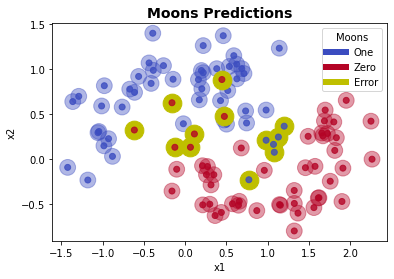

In [ ]:
cmap_data = plt.cm.coolwarm 

y_pred = clf.predict(X)

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.8)
plt.scatter(X.x1, X.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.4)

plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, c=y[y_pred != y], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



E podemos ainda verificar a *fronteira de decisão* do estimador.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


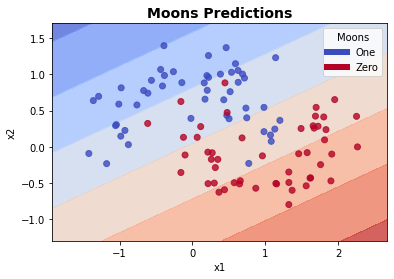

In [ ]:
x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.8)  
plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

# CASO: Estimando Tumores Malignos ou Benignos.

Os dados a seguir são características computadas a partir de imagens digitalizadas de um aspirado por agulha fina (PAAF) de massas mamárias. Eles descrevem características dos núcleos celulares presentes na imagem e, dado um conjunto de tumores já classificados, podemos um modelo de regressão logística para prever novos casos como Benignos ou Malignos. Para descrição detalhada desses dados você pode acessar  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)



<img src="https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/linearregressionlogitbreast1.PNG?raw=true" width=1200, align="right"> 

<small>

<b>
Figura 6. Modelos Logístico e de Regressão linear aplicado aos dados da base Breast-Cancer.  

## Acessando os dados

Vamos aplicar um modelo de Regressão Logística para prever o diagnóstico dos tumores empregando apenas algumas características.

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv')
df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']] # vamos empregar apenas uma parte dos dados
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


## Modelo de Regressão Logística



O modelo vai fornecer uma estimativa da probabilidade de 'diagnosis' benigno, \\\4P(\text{diagnosis}=B)$ com base nos valores de 'radius_mean', 'texture_mean', 'perimeter_mean'.


$$ y_\text{pred} = P(\text{diagnosis}=B) = \frac{exp( a_0 + a_1	\text{radius_mean}	+ a_2 \text{texture_mean}	+ a_3 \text{perimeter_mean})}{1 + exp( a_0 + a_1	\text{radius_mean}	+ a_2 \text{texture_mean}	+ a_3 \text{perimeter_mean})}$$

O modelo calcula a probabilidade de uma classe de valor $1$ (no caso de um atributo $0$ ou $1$), ou do valor primeiro valor no caso de caracteres ('B', será neste caso). 

Note ainda que os valores do atributo precisam ser numéricos!

## Implementação do Modelo Logístico

A implementação segue os mesmos passos do exemplo implementado anteriormente e aqui, novamente, nenhuma preparação dos dados é necessária.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Entradas e Saídas
X = df[['radius_mean', 'texture_mean', 'perimeter_mean']]
y = df['diagnosis']

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))



0.9086115992970123


Obtemos um acerto de 90% dos dados sobre o conjunto de treinamento e, se você considera esse um bom resultado, pode aplicá-lo para estimar novos casos. Por exemplo, para um tumor com valores $(\text{radius_mean,texture_mean,perimeter_mean})=$ $( 15.1, 15.8, 90)$.

In [ ]:
# Predição
X_new = pd.DataFrame({'radius_mean': [15.1], 'texture_mean': [15.8], 'perimeter_mean': [90]  })
y_pred_case = clf.predict(X_new)

print(5*'\n' + 'x = ' , X_new, '\npredição = ', y_pred_case)






x =     radius_mean  texture_mean  perimeter_mean
0         15.1          15.8              90 
predição =  ['B']


Se você quiser, você pode empregar os valores de `y_pred` para complementar e comparar os dados.

In [ ]:
print(y_pred[0:10],'...')

['M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M'] ...


In [ ]:
df['y_pred'] = y_pred 
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,y_pred
0,M,17.99,10.38,122.80,M
1,M,20.57,17.77,132.90,M
2,M,19.69,21.25,130.00,M
3,M,11.42,20.38,77.58,B
4,M,20.29,14.34,135.10,M


E também pode obter explicitamente os coeficientes empregados.

In [ ]:
print(clf.coef_, clf.intercept_)

[[-3.2954799   0.22087804  0.65043105]] [-18.17021723]


A acuracidade do modelo pode ser obtida diretamente, como fizemos acima, mas também de duas formas empregando funções do scikit-learn para obtenção do *score* dos modelos. 

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print('\nScore de Acuracidade (modo 1):\n')
print(accuracy)

accuracy = clf.score(X, y)
print('\nScore de Acuracidade (modo 2):\n')
print(accuracy)


Score de Acuracidade (modo 1):

0.9086115992970123

Score de Acuracidade (modo 2):

0.9086115992970123


# Dilema Viés-Variância

Parece bastante simples construir esses modelos, mas construir bons modelos pode ser uma tarefa bastante difícil.
Vamos nos deter um pouco mais sobre como podemos avaliar os modelos.  

Vamos começar entendo o que é conhecido como **Dilema Viés-Variância** (ou *Bias–variance tradeoff*). 

A capacidade de um modelo de capturar a verdadeira relação entre as variáveis preditoras e a variável objetivo é o que chamamos de viés (*bias*). Um alto erro de viés significa que o modelo não se ajusta aos dados e que, portanto, não consegue representar os dados. No limite ele não está aprendendo nada. É o que chamamos de **subajuste do modelo**, ou *underfitting*. Essa, é claro, é uma situação que não queremos. 

Entretanto, ao tentarmos reduzir o erro de viés dos dados podemos nos deparar com um outro problema. Com um viés muito pequeno o modelo poder ficar tão ajustado aos dados de treinamento que falha ao tentar prever novos casos que não faziam parte do conjunto de treinamento. Neste caso, o modelo captura toda a variância dos dados. Você pode entender que o modelo passa a ser muito sensível a diferentes conjuntos de treinamento e erra ao *generalizar* novos casos. Isso é o que chamamos de **subreajuste do modelo**, ou *overfitting*.  

O dilema está, portanto, em obter o ponto de equilíbrio entre o subajuste e sobreajuste dos dados. 



## Exemplo em Modelos de Regressão

O underfitting/overfitting pode ocorrer tanto em modelos de regressão como em modelos de classificação. O exemplo a seguir demonstra o problema de underfitting/overfitting para um caso de regressão. 

Automatically created module for IPython interactive environment


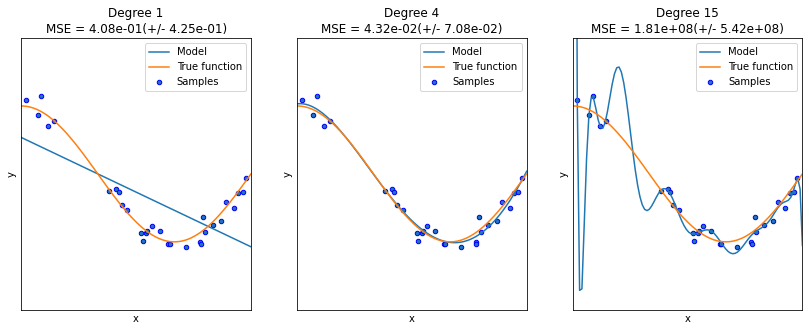

In [ ]:
# fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

A função que queremos aproximar é uma parte da função cosseno (linha laranja) e foram empregados modelos polinomiais de diferentes graus para aproximar a função (regressão). A função linear (polinômio com grau 1, linha azul) claramente é insuficiente para ajustar os dados de treinamento (underfitting). Um polinômio de grau 15 entretanto ajusta a maior parte dos pontos de dados do conjunto de treinamento, mas aprende desse modo todo o *ruído* ou variância dos dados, o que leva a um modelo (linha azul) que claramente falhará na predição de valores de novos casos (overfitting). O polinômio de grau 4, por outro lado, parece aproximar a função verdadeira quase perfeitamente. 



## Exemplo em Modelos de Classificação

Isso pode igualmente ocorrer em modelos de Classificação.

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/SobreESubAjuste.png?raw=true)


<small>
<b>
Figura 7. Exemplos de underfitting e overfitting (Produzido com https://ml-playground.com/#)

Na figura acima o primeiro classificador é simplesmente um separador linear e erra ao classificar vários pontos de dados do conjunto de treinamento - é um modelo muito simples que não representa um modelo da classificação dos dados. Por outro lado, o terceiro modelo, captura toda a variância do conjunto de treinamento e classifica todas as instâncias corretamente, o que certamente, levará a falha de classificação de novos casos. 

>  **Dilema Viés-Variância. Isso pode ficar mais claro se você pensar do seguinte modo. Olhe os pontos grandes em vermelho da figura abaixo. Considere que eles seriam novos casos que você deve classificar. São novos casos, e você pode pensar no nosso exemplo de empréstimos, você não sabe antecipadamente se o cliente irá ou não pagar o empréstimo, mas você deseja definir a classe mais provável com base nos casos anteriores. Em quais classificações você apostaria? Certamente a classificação do meio. O primeiro é um modelo insuficiente para capturar todo o viés dos dados, e o terceiro, erra ao capturar todo o viés dos dados não generalizando suficientemente novos casos.**

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/SobreESubAjuste2.png?raw=true)

<small>
<b>
Figura 8. Underfitting e overfitting, Em que valores você appostaria? (Produzido com https://ml-playground.com/#)

# Diminuido o risco de *Overfitting*: Conjuntos de Treinamento e Teste

Aprender ou treinar parâmetros de um modelo de predição e testá-lo com os mesmos dados é um erro de método. É como dar uma prova para avaliar o conhecimento de um aluno somente com exercícios que já foram dados previamente na sala da aula.  Seria um modelo que apenas repete os rótulos das amostras podendo ser perfeito nesses dados, mas sem grande utilidade para predição de novos casos (sobreajuste). 

Para evitar o sobreajuste, temos que definir dois conjuntos diferentes de dados a partir dos dados originais, um conjunto de Treinamento e um conjunto de Teste:

* O *conjunto de treinamento* `X_train`, `y_train` será a parte dos dados que empregada para o treinamento dos parâmetros do modelo 

* O *conjunto de teste* `X_test`, `y_test` será a parte dos dados que empregada para avaliar o modelo preditivo ajustado

Essa divisão do conjunto original de dados deve ser aleatória (*por que?*) e pode ser obtida com o `scikit-learn` empregando-se a função `train_test_split()`. Seguiremos daqui em diante somente analisando modelos de classificação.

Vamos então aplicar essa abordagem mais correta ao nosso conjunto de dados *Moons*. 




![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/TrainTest.png?raw=true)

<small>
<b>
Figura 9. Evitando o Overfitting. Particionando o conjunto de dados original nos Conjuntos de Treinamento e Teste. 

### Recriando os dados de *Moons*

In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

### Modelo *sem* a Separação dos Conjuntos de Treinamento e Teste

Este é um  modelo básico, mas com uma abordagem metodologicamente pois, ao empregar o mesmo conjunto para treinamento e a medida de desempenho do modelo pode levar ao sobre ajuste do modelo, e consequente erro de generalização.  

In [ ]:
from sklearn.linear_model import LogisticRegression 

X = df[['x1','x2']]
y = df.y

clf = LogisticRegression(max_iter=1000)

clf.fit(X,y)

y_pred = clf.predict(X)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )


[0 0 1 1 1 1 1 0 0 0] ...
0.87


### Modelo *com* a Separação dos Conjuntos de Treinamento e Teste

Aqui a  abordagem correta, emprega conjunto diferentes treinamento e teste escolhidos aleatoriamente sobre os dados originais.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X_test,y_test) )


[0 1 0 0 0 0 1 1 0 1] ...
0.86


O parâmetro `stratify=y` indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo `y`. Os parâmetros `test_size=0.3` indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o parâmetro `random_state=123` é para a reprodutibilidade dos resultados.



Abaixo, a inspeção visual, mostrando apenas 2 erros de classificação no conjunto de teste.

In [ ]:
sum(y_test != y_pred)

2

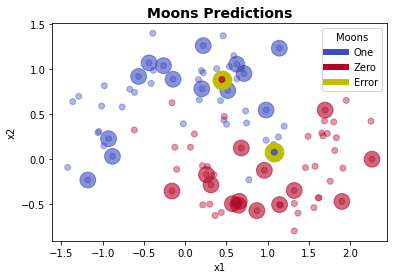

In [ ]:
cmap_data = plt.cm.coolwarm 

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.4) # todos dados
plt.scatter(X_test.x1, X_test.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.6) # somente dados de teste

plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, c=y_test[y_pred != y_test], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



# CASO: 10 year risk of coronary heart disease CHD

Aqui o objetivo da classificação é prever se o paciente tem 10 anos de risco de futura doença cardíaca coronariana (ACS). O conjunto de dados fornece informações de mais de 4.000 pacientes residentes da cidade de Framingham, Massachusettse com 15 atributos. 

A variável objetivo é `TenYearCHD`, *10 year risk of coronary heart disease CHD* (onde “1”, significa “Yes”, “0” significa “No”)


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Preparação dos Dados

As variáveis preditoras são todas numéricas e não há, portanto, necessidade de transformação dos dados. Há, entretanto, valores ausentes que precisam ser tratados.

In [ ]:
df.isnull().sum() / len(df)

male               0.000000
age                0.000000
education          0.024764
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

O percentual é pequeno e assim vamos simplesmente excluir os dados ausentes.

In [ ]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


## Aplicando o Modelo Logístico

Aplicamos o modelo ajustando agora as entradas `X` e `y` para o modelo. O `max_iter` do regressor também foi ajustado para $10000$ uma vez que o conjunto de dados agora é maior e um maior número de iterações será necessário para convergência dos parâmetros.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )

[0 0 1 0 0 0 0 0 0 0] ...
0.8523783488244943


## Predição de Novos Casos

Se considerarmos 0.85 um bom resultado podemos então aplicar o modelo para novos casos. Por exemplo, podemos fazer predição para pacientes homens e mulheres hipotéticos em que todos os indicadores estejam no percentil 0.75.

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75) ).reset_index()
X_new

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,56.0,3.0,1.0,10.0,0.0,0.0,1.0,0.0,268.0,146.0,89.0,27.71,85.0,86.0
1,1,56.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,259.0,141.0,90.0,28.30,80.0,87.0


In [ ]:
clf.predict(X_new)

array([0, 0])

Surpreendentemente esses pacientes não apresentam risco segundo nosso modelo e você pode verificar outros percentis, como o percentil 0.9 em que já estimamos o risco para pacientes do sexo masculino.

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.90) ).reset_index()
clf.predict(X_new)

array([0, 1])

# Acuracidade: Cuidado e Outras Métricas

Até aqui nossos resultados parecem serem muito bons, com acuracidades acima de 0.8 mesmo quando medida sobre o conjunto de teste.

Mas uma boa acuracidade geral (simplesmente o percentual total de acertos), pode não ser suficiente para produzir bons modelos e pode mesmo, mascarar modelos bastante ruins.

Veja este exemplo, um problema bastante comum de classes desbalanceadas,

| Real/Pred | Maligno | Benigno |
|-|-|-|
| Maligno | 1 | 2 |
| Benigno | 0 | 97 |

A matriz acima é chamada de **matriz de confusão**. Ela apresenta nas linhas os valores reais dos dados e nas colunas as predições. São assim 3 casos reais de casos Malignos, mas apenas 1 foi classificado  corretamente e 2 desses casos foram classificados como benignos. Já os 97 benignos foram todos classificados corretamente. O modelo tem, portanto, acuracidade de 99%!!! ($2+97=$ total de casos classificados corretamente). Entretanto, é fácil ver, o modelo falha miseravelmente ao prever os casos Malignos (acerta apenas 33% desses casos), trazendo um grande risco aos pacientes. É um mal modelo apesar da alta acuracidade geral, e você pode notar que um modelo *trivial* que atribuísse à TODOS os casos a classe 'benigno', já daria uma acuracidade de 97%. 

Felizmente, para nós seres humanos, as amostras de tumores malignos é bastante menor que de casos benignos, assim como são bastante menos comuns os casos de fraude ou de e-mails spam, mas classes desbalanceadas como nesses casos representam um grande desafio para o Aprendizado de Máquina. 

Esse é o gancho para, na próxima aula, verificarmos outras métricas dos modelos de classificação.


# Sumário da Aula

Nesta aula você aprendeu o que é e como empregar o **modelo de regressão logística**. Mas mais do que isso! Este é apenas um dos modelos de Classificação que podemos empregar e, empregando o modelo logístico aprendemos uma série de conceitos que se aplicam a quaisquer modelos de Classificação! É o caso do **esquema geral de implementação dos estimadores de classificação do scikit-learn**, o uso de **conjuntos de treinamento e teste**, a medida de **acuracidade** como uma métrica da eficiência dos classificadores ou o problema do **Dilema Viés-Variância**, presente em quaisquer modelos supervisionados. Todos esses recursos serão empregados em outros modelos de classificação que você verá a seguir, como o K-Vizinhos Mais Próximos, as Árvores de Decisão ou mesmo os modelos Neurais em cursos seguintes.





# Para Saber Mais

* Pesquise e Discuta. **O que há de errado com a regressão linear para classificação?** O modelo de regressão linear pode funcionar bem para regressão, mas falha na maior parte dos casos quando é aplicado para classificação. Imagine, você poderia rotular uma das classes com 0 e a outra com 1 e usar a regressão linear. Tecnicamente isso funciona e certamente você obterá os coeficientes da regressão linear, afinal para quaisquer conjuntos de pontos $(X, y)$ podemos calcular os coeficientes de um modelo linear. Mas para classificação essa abordagem apresenta muitos problemas.
Você pode aprender mais sobre isso aqui: https://christophm.github.io/interpretable-ml-book/logistic.html ou ainda em  https://stats.stackexchange.com/questions/22381/why-not-approach-classification-through-regression. 

* **Pesquise**. Aqui você aprendeu que a regressão logística permite fazer apenas classificações binárias (classes dicotômicas). Pesquise e discuta esses dois pontos da regressão logística:

> * **Como empregar a regressão logística para um problema multiclasse?**

> * **A Regressão logística é um separador linear o que isso significa?** (veja o exemplo abaixo!)





         x1        x2  y
0  0.401331  0.885831  0
1 -0.234227 -0.844913  1
2  0.678022  0.334662  1
3  0.969801 -0.232501  0
4  0.100768 -0.821603  1


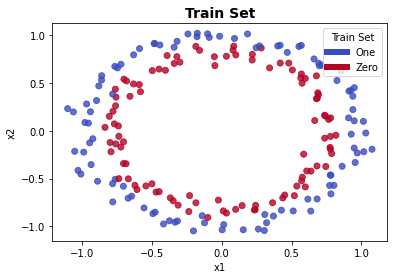

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, factor=0.8, noise=0.05, random_state=0)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
print(df.head())

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Train Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Train Set')

plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))

0.495


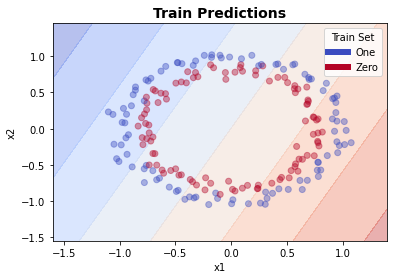

In [ ]:
X = df
x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.4)  
plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.4)
plt.title('Train Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Train Set')

plt.show()

# Referências

* Kotu, Vijay; Deshpande, Balachandre **Data Science: concepts and practice**. 2nd ed. Cambridge, [England]: Morgan Kaufmann, c2019. E-book (570 p.) ISBN 9780128147627 (electronic bk.). Disponível em: http://pergamum.mackenzie.br:8080/pergamumweb/vinculos/00003c/00003cef.jpg.

* Jake VanderPlas. **Python Data Science Handbook**  O'Reilly Media, Inc. (2016). ISBN: 9781491912058. Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. Acesso: 06 de Novembro de 2021.

* Larose, Chantal D.; Larose, Daniel T. **Data Science Using Python and R** Hoboken: Wiley, c2019. E-book (259 p.) (Wiley Series on Methods and Applications in Data Mining Ser.). ISBN 9781119526834 (electronic bk.). Disponível em: https://www3.mackenzie.br/biblioteca_virtual/index.php?tipoBiblio=ebookcentral&flashObg=n

* ___. **An introduction to machine learning with scikit-learn** Disponível em: https://scikit-learn.org/stable/tutorial/basic/tutorial.html Acesso em: 30 de Março de 2022.

* ___. **scikit-learn: machine learning in Python** Disponível em: http://scipy-lectures.org/packages/scikit-learn/index.html Acesso em: 30 de Março de 2022.

* Molnar, Christoph. **Interpretable Machine Learning
A Guide for Making Black Box Models Explainable** Disponível em: https://christophm.github.io/interpretable-ml-book/ Acesso em: 30 de Março de 2022.
